In [1]:
import re
import csv
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
%matplotlib inline 

Problem A

In [156]:
data=pd.read_csv('mock_student_data.csv')

1.The first task is to load the file and generate summary statistics for each field as well as probability distributions or histograms. The summary statistics should include mean, median, mode, standard deviation, as well as the number of missing values for each field.

In [47]:
data

,ID,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
0,1,Wayne,Boyd,Florida,Male,19,NaN,9,Yes
1,2,Ann,Matthews,Pennsylvania,Female,18,3,NaN,Yes
2,3,George,Matthews,Texas,NaN,17,NaN,10,Yes
3,4,Jerry,Ramos,California,Male,15,2,28,No
4,5,Andrea,Carroll,North Carolina,Female,NaN,2,29,No
5,6,Annie,Fisher,Virginia,Female,19,NaN,5,Yes
6,7,Stephanie,Barnes,Oklahoma,Female,NaN,3,20,No
7,8,Janet,Jenkins,Louisiana,Female,15,4,20,Yes
8,9,Betty,Miller,NaN,NaN,17,3,23,No
9,10,Henry,Woods,Colorado,Male,19,4,14,Yes


In [76]:
stats=data.describe(include='all').transpose()
stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1000,NaN,NaN,NaN,500.5,288.819,1,250.75,500.5,750.25,1000
First_name,1000,200,Amy,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_name,1000,244,Ross,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,884,49,Texas,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,774,2,Female,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,771,NaN,NaN,NaN,16.9961,1.45807,15,16,17,18,19
GPA,779,NaN,NaN,NaN,2.98845,0.818249,2,2,3,4,4
Days_missed,808,NaN,NaN,NaN,18.0111,9.62937,2,9,18,27,34
Graduated,1000,2,Yes,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
stats['missing']=1-stats['count']/1000

In [78]:
stats['median']=data.median()

In [79]:
stats['mode']=data.mode().transpose()[0]

In [80]:
summary_statistics=stats[['mean','median','mode','std','missing']]
summary_statistics

,mean,median,mode,std,missing
ID,500.5,500.5,NaN,288.819,0
First_name,NaN,NaN,Amy,NaN,0
Last_name,NaN,NaN,Ross,NaN,0
State,NaN,NaN,Texas,NaN,0.116
Gender,NaN,NaN,Female,NaN,0.226
Age,16.9961,17.0,15,1.45807,0.229
GPA,2.98845,3.0,2,0.818249,0.221
Days_missed,18.0111,18.0,6,9.62937,0.192
Graduated,NaN,NaN,Yes,NaN,0


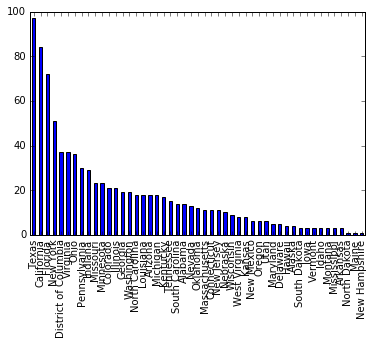

In [157]:
data.State.value_counts().plot(kind = 'bar')

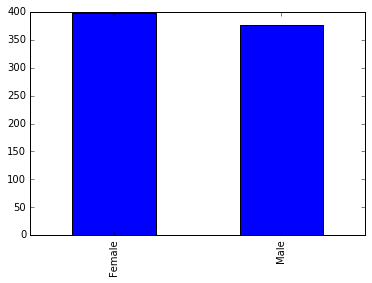

In [158]:
data.Gender.value_counts().plot(kind = 'bar')

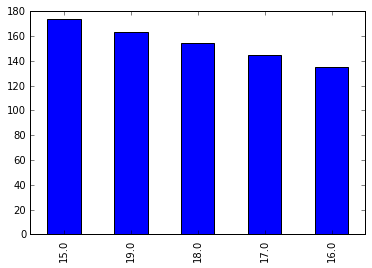

In [159]:
data.Age.value_counts().plot(kind = 'bar')

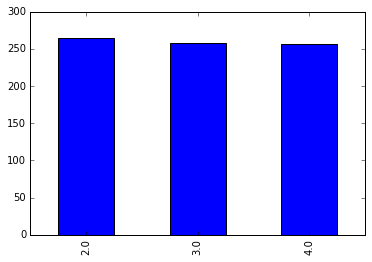

In [160]:
data.GPA.value_counts().plot(kind = 'bar')

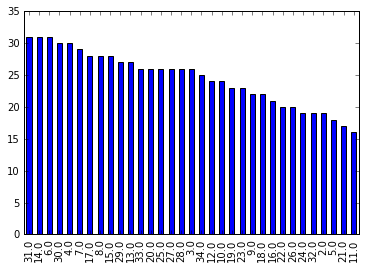

In [161]:
data.Days_missed.value_counts().plot(kind = 'bar')

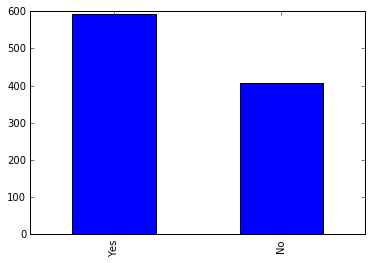

In [162]:
data.Graduated.value_counts().plot(kind = 'bar')

2.You will notice that a lot of students are missing gender values . Your task is to infer the gender of the student based on their name. Please use the API at www.genderize.io to infer the gender of each student and generate a new data file.

In [102]:
import requests, json
dat = data.fillna('')
n=0
for name,gender in zip(dat['First_name'],dat['Gender']):
    if gender == '':
        req = requests.get('http://api.genderize.io?name=' + name)
        result = json.loads(req.text)
        dat.loc[n, 'Gender']=result["gender"]
    n=n+1
dat

,ID,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
0,1,Wayne,Boyd,Florida,Male,19,,9,Yes
1,2,Ann,Matthews,Pennsylvania,Female,18,3,,Yes
2,3,George,Matthews,Texas,male,17,,10,Yes
3,4,Jerry,Ramos,California,Male,15,2,28,No
4,5,Andrea,Carroll,North Carolina,Female,,2,29,No
5,6,Annie,Fisher,Virginia,Female,19,,5,Yes
6,7,Stephanie,Barnes,Oklahoma,Female,,3,20,No
7,8,Janet,Jenkins,Louisiana,Female,15,4,20,Yes
8,9,Betty,Miller,,female,17,3,23,No
9,10,Henry,Woods,Colorado,Male,19,4,14,Yes


In [103]:
dat.to_csv('fillgender.csv')

3.You will also notice that some of the other attributes are missing. Your task is to fill in the missing values for Age, GPA, and Days_missed using the following approaches:

A.Fill in missing values with the mean of the values for that attribute

In [112]:
data=pd.read_csv('mock_student_data.csv')
data['Age_mean'] = data['Age'].fillna(data['Age'].mean())
data['GPA_mean'] = data['GPA'].fillna(data['GPA'].mean())
data['Days_missed_mean'] = data['Days_missed'].fillna(data['Days_missed'].mean())
data.to_csv('fillmean.csv')

B.Fill in missing values with a class-conditional mean (where the class is whether they graduated or not).

In [117]:
data=pd.read_csv('mock_student_data.csv')
data['Age_cmean'] = data.groupby('Graduated')['Age'].transform(lambda x: x.fillna(x.mean()))
data['GPA_cmean'] = data.groupby('Graduated')['GPA'].transform(lambda x: x.fillna(x.mean()))
data['Days_missed_cmean'] = data.groupby('Graduated')['Days_missed'].transform(lambda x: x.fillna(x.mean()))
data.to_csv('fillclassmean.csv')

C.Is there a better, more appropriate method for filling in the missing values? If yes, describe and implement it. 

In [149]:
data=pd.read_csv('fillgender.csv')
data['Age_mcmean'] = data.groupby(['Graduated','Gender','State','Days_missed','GPA'])['Age'].transform(lambda x: x.fillna(x.mean()))
data['Age_mcmean'] = data.groupby(['Graduated','Gender','State','Days_missed'])['Age_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['Age_mcmean'] = data.groupby(['Graduated','Gender','State'])['Age_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['Age_mcmean'] = data.groupby(['Graduated','Gender'])['Age_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['Age_mcmean'] = data.groupby(['Graduated'])['Age_mcmean'].transform(lambda x: x.fillna(x.mean()))

In [150]:
data['GPA_mcmean'] = data.groupby(['Graduated','Gender','State','Days_missed','Age'])['GPA'].transform(lambda x: x.fillna(x.mean()))
data['GPA_mcmean'] = data.groupby(['Graduated','Gender','State','Days_missed'])['GPA_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['GPA_mcmean'] = data.groupby(['Graduated','Gender','State'])['GPA_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['GPA_mcmean'] = data.groupby(['Graduated','Gender'])['GPA_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['GPA_mcmean'] = data.groupby(['Graduated'])['GPA_mcmean'].transform(lambda x: x.fillna(x.mean()))

In [151]:
data['Days_missed_mcmean'] = data.groupby(['Graduated','Gender','State','GPA','Age'])['Days_missed'].transform(lambda x: x.fillna(x.mean()))
data['Days_missed_mcmean'] = data.groupby(['Graduated','Gender','State','GPA'])['Days_missed_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['Days_missed_mcmean'] = data.groupby(['Graduated','Gender','State'])['Days_missed_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['Days_missed_mcmean'] = data.groupby(['Graduated','Gender'])['Days_missed_mcmean'].transform(lambda x: x.fillna(x.mean()))
data['Days_missed_mcmean'] = data.groupby(['Graduated'])['Days_missed_mcmean'].transform(lambda x: x.fillna(x.mean()))

In [153]:
data.to_csv('fillclustermean.csv')